In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**5. We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.(a) Generate a data set with n = 500 and p = 2, such that the obser-
vations belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows:**
> x1=runif(500) -0.5
> x2=runif(500) -0.5
> y=1*(x1^2-x2^2 > 0)

In [2]:
np.random.seed(2012)
x1 = np.random.uniform(-0.5,0.5,500)
x2 = np.random.uniform(-0.5,0.5,500)
y = ((x1 ** 2 - x2 ** 2) > 0) * 1

**(b) Plot the observations, colored according to their class labels.
Your plot should display X 1 on the x-axis, and X 2 on the y-
axis.**

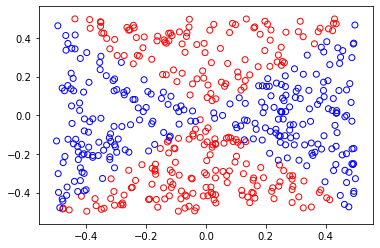

In [3]:
from matplotlib.colors import ListedColormap
color_list =  ['red','blue','green','black','yellow','brown','peru']
cmap = ListedColormap(color_list[:2])
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x1[y == cls], x2[y == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

**(c) Fit a logistic regression model to the data, using X 1 and X 2 as
predictors.**

**sklearn方案**

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
X = np.c_[x1,x2]
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**statsmodels方案对比**

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
Data_test = pd.DataFrame({'y':y,'x1':x1,'x2':x2})
glm_for_show = smf.glm('y ~ x1 + x2',data = Data_test, family = sm.families.Binomial()).fit()
glm_for_show.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -346.04
Date:                Thu, 09 Jan 2020   Deviance:                       692.07
Time:                        21:29:54   Pearson chi2:                     500.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0266      0.090      0.295      0.768      -0.150       0.203
x1             0.2796      0.310      0.902      0.367      -0.328       0.887
x2             0.1211      0.314      0.386      0.700      -0.494       0.736
==============================================================================
"""

**(d) Apply this model to the training data in order to obtain a pre-
dicted class label for each training observation. Plot the ob-
servations, colored according to the predicted class labels. The
decision boundary should be linear.**

**sklearn方案**

In [6]:
y_predict_sk = log_reg.predict(X)

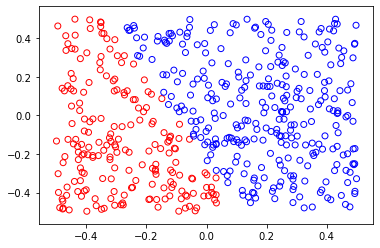

In [7]:
for idx, cls in enumerate(np.unique(y_predict_sk)):
        plt.scatter(x1[y_predict_sk == cls], x2[y_predict_sk == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

**statsmodels方案**

In [8]:
y_predict_sm = (glm_for_show.predict() > 0.5)  * 1

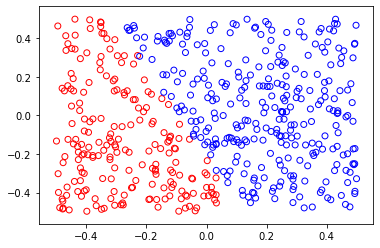

In [9]:
for idx, cls in enumerate(np.unique(y_predict_sm)):
        plt.scatter(x1[y_predict_sm == cls], x2[y_predict_sm == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

**(e) Now fit a logistic regression model to the data using non-linear
functions of X 1 and X 2 as predictors (e.g. X 2
1 , X 1 ×X 2 , log(X 2 ),
and so forth).**

**使用statsmodels方案存在Perfect separation detected, results not available，只使用sklearn**

In [10]:
log_reg_poly = LogisticRegression()
X_poly = np.c_[x1,x2,x1 ** 2,x2 ** 2]
log_reg_poly.fit(X_poly,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
log_reg_log = LogisticRegression()
X_log = np.c_[x1,x2,np.log(x1 + 0.5),np.log(x2 + 0.5)]
log_reg_log.fit(X_log,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
log_reg_multiply = LogisticRegression()
X_multiply = np.c_[x1,x2,x1 * x2]
log_reg_multiply.fit(X_multiply,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**(f) Apply this model to the training data in order to obtain a pre-
dicted class label for each training observation. Plot the ob-
servations, colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)-(e) until you come up with an example in which
the predicted class labels are obviously non-linear.**

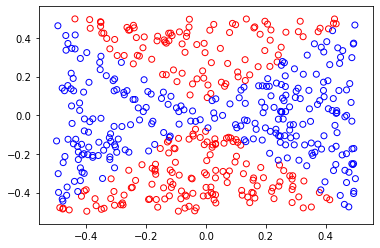

In [13]:
y_predict_poly = log_reg_poly.predict(X_poly)
for idx, cls in enumerate(np.unique(y_predict_poly)):
        plt.scatter(x1[y_predict_poly == cls], x2[y_predict_poly == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

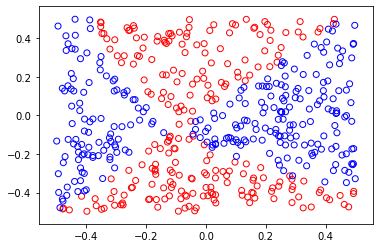

In [14]:
y_predict_log = log_reg_log.predict(X_log)
for idx, cls in enumerate(np.unique(y_predict_log)):
        plt.scatter(x1[y_predict_log == cls], x2[y_predict_log == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

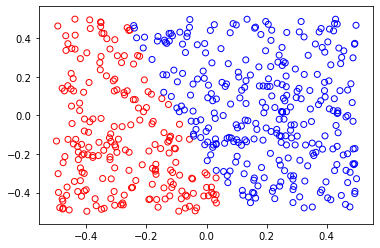

In [15]:
y_predict_multiply = log_reg_multiply.predict(X_multiply)
for idx, cls in enumerate(np.unique(y_predict_multiply)):
        plt.scatter(x1[y_predict_multiply == cls], x2[y_predict_multiply == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

**(g) Fit a support vector classifier to the data with X 1 and X 2 as
predictors. Obtain a class prediction for each training observa-
tion. Plot the observations, colored according to the predicted
class labels.**

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", C = 10)
svc.fit(X,y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

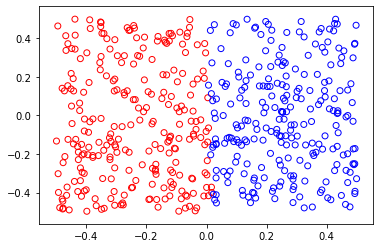

In [17]:
y_predict_svc = svc.predict(X)
for idx, cls in enumerate(np.unique(y_predict_svc)):
        plt.scatter(x1[y_predict_svc == cls], x2[y_predict_svc == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

**(h) Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.**

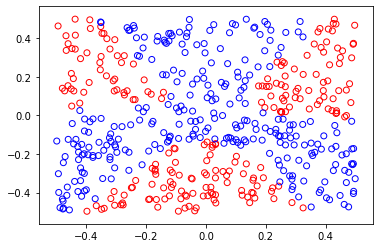

In [18]:
svm_poly = SVC(kernel="poly", C = 10)
svm_poly.fit(X,y)
y_predict_poly = svm_poly.predict(X)
for idx, cls in enumerate(np.unique(y_predict_poly)):
        plt.scatter(x1[y_predict_poly == cls], x2[y_predict_poly == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

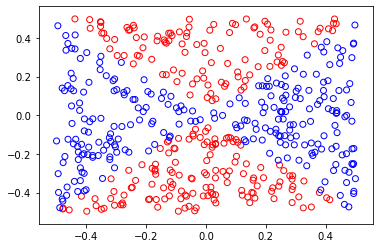

In [19]:
svm_poly = SVC(kernel="poly", degree = 2 ,C = 10,gamma = 10)
svm_poly.fit(X,y)
y_predict_poly = svm_poly.predict(X)
for idx, cls in enumerate(np.unique(y_predict_poly)):
        plt.scatter(x1[y_predict_poly == cls], x2[y_predict_poly == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

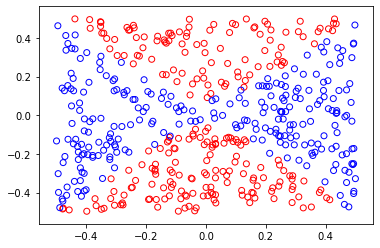

In [20]:
svm_rbf = SVC(kernel="rbf", C = 10)
svm_rbf.fit(X,y)
y_predict_rbf = svm_rbf.predict(X)
for idx, cls in enumerate(np.unique(y_predict_rbf)):
        plt.scatter(x1[y_predict_rbf == cls], x2[y_predict_rbf == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

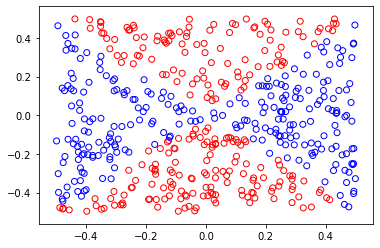

In [21]:
svm_rbf = SVC(kernel="rbf", C = 10,gamma = 10)
svm_rbf.fit(X,y)
y_predict_rbf = svm_rbf.predict(X)
for idx, cls in enumerate(np.unique(y_predict_rbf)):
        plt.scatter(x1[y_predict_rbf == cls], x2[y_predict_rbf == cls], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

**(i) Comment on your results.**

通过对逻辑斯谛回归选用合适的非线性特征变量，或者对向量机选用核实的gamma（或degree）都可以得到较好的模型，但实际模型选择过程中对gamma（或degree）调参要比选用不同的非线性特征变量要简单。